In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyxlsb import convert_date
from utils import *

In [2]:
# The data files is stored in the data directory under the root directory of this repo. 
data_dir = "../../data/data/dataanalysis/"
output_dir = "Plots2/"
# Name of the file being read
case_sheet = "bmc_cases.xlsb"

#Read the file
input_df = pd.read_excel(data_dir+case_sheet,engine='pyxlsb',header=None)

In [3]:
# Some sheets have a blank row at top and some don't. By reading without header, dropping the blank rows and assigning the top row as header back, we can fix this. 
# If there is a better solution to this, or later if this problem is resolved if we shift to S3 containers, feel free to edit. 
input_df = input_df.dropna(how='all')
data = input_df[1:]
data.columns = input_df.iloc[0]

In [4]:
# Columns Required for this analysis. Filtering for easy visualizations
columns_required = ['Date','Age','Gender','Patient Location (Central)','Patient Status (Central)']
df = data[columns_required]
df['Age Bracket'] = df.apply(lambda x: get_age_bracket(x),axis=1)
df['Date'] = df.apply(lambda x: convert_date(x['Date']),axis=1)

#Add week column to group week wise

/Users/ayushd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/ayushd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
# Count all the non-na (non-empty) values in each columns
nvals = data.notna().sum()
print(nvals)

0
Date                                           100487
S No                                            52926
Ward                                           100487
Test ID (ICMR)                                 100473
Patient name                                        0
Age                                            100487
Gender                                         100487
Mobile Number                                       0
Present Address                                     0
Transferred from Ward                            9015
HealthPost Allocation                           74370
Traceable?                                      98535
Out of Mumbai (Yes / No)                        72999
Assign to other ward                             5828
Person / Official from other ward                   0
Duplicate Entry\n(Yes / No)                     66879
Previous Test ID (only if Duplicate is Yes)      3262
Patient Type (Index / Contact)                  70012
Patient Status            

In [6]:
def plot_age_gender(df,suffix):
    ag,gen = age_gender_distribution(df)
    
    # Age
    xlabel = "Date When Patient Was Detected Positive"
    ylabel = "Number of Patients"
    title = "No. of new cases of patients whose final status was : " + suffix
    filename = "AgeDist_"+suffix+".png"
    plot_multiple_time_series(ag,'Age Bracket','Date','patient count',xlabel,ylabel,title,filename)
    
    # Gender
    xlabel = "Date When Patient Was Detected Positive"
    ylabel = "Number of Patients"
    title = "No. of new cases of patients whose final status was : " + suffix
    filename = "GenderDist_"+suffix+".png"
    plot_multiple_time_series(gen,'Gender','Date','patient count',xlabel,ylabel,title,filename)
    
    return ag,gen
    

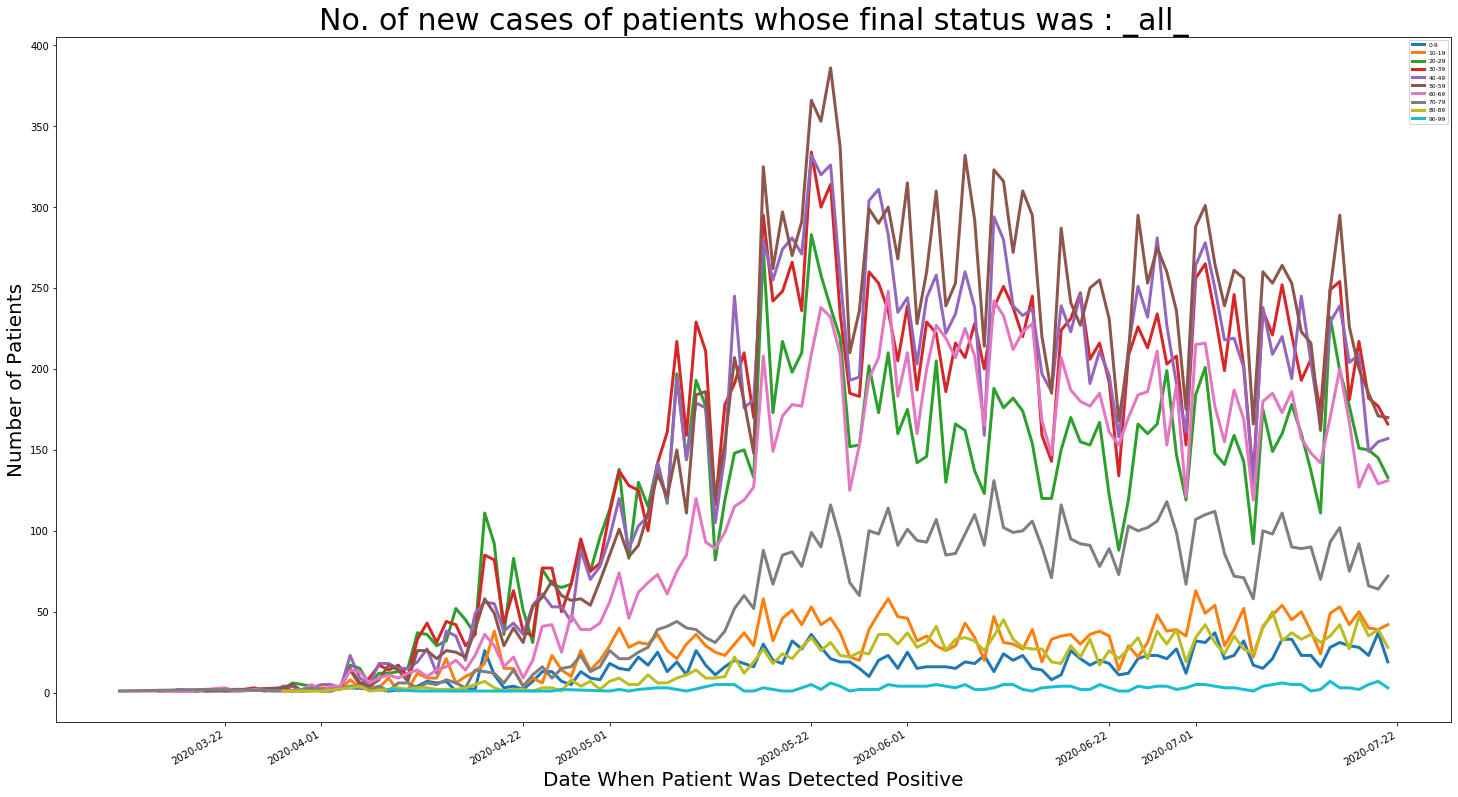

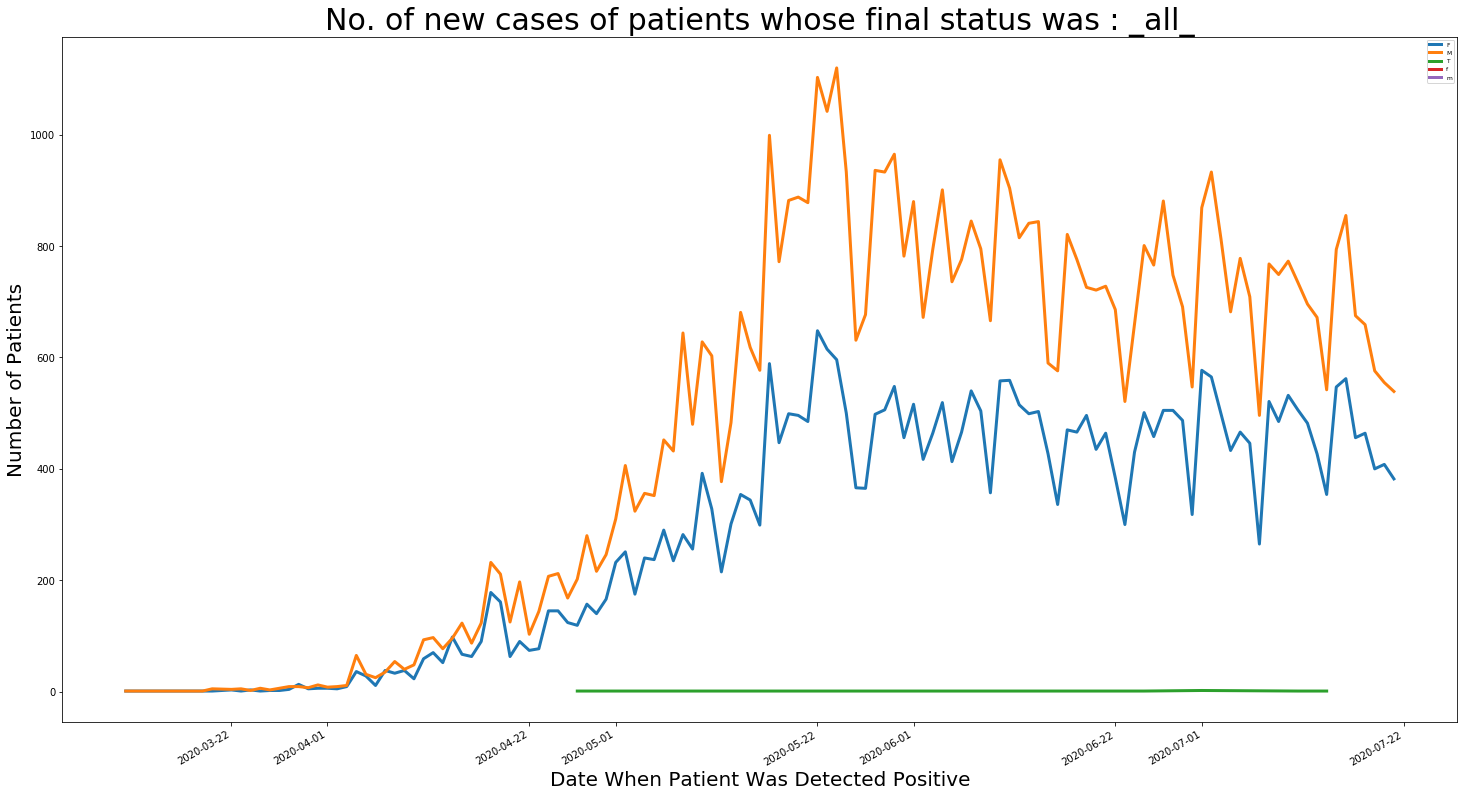

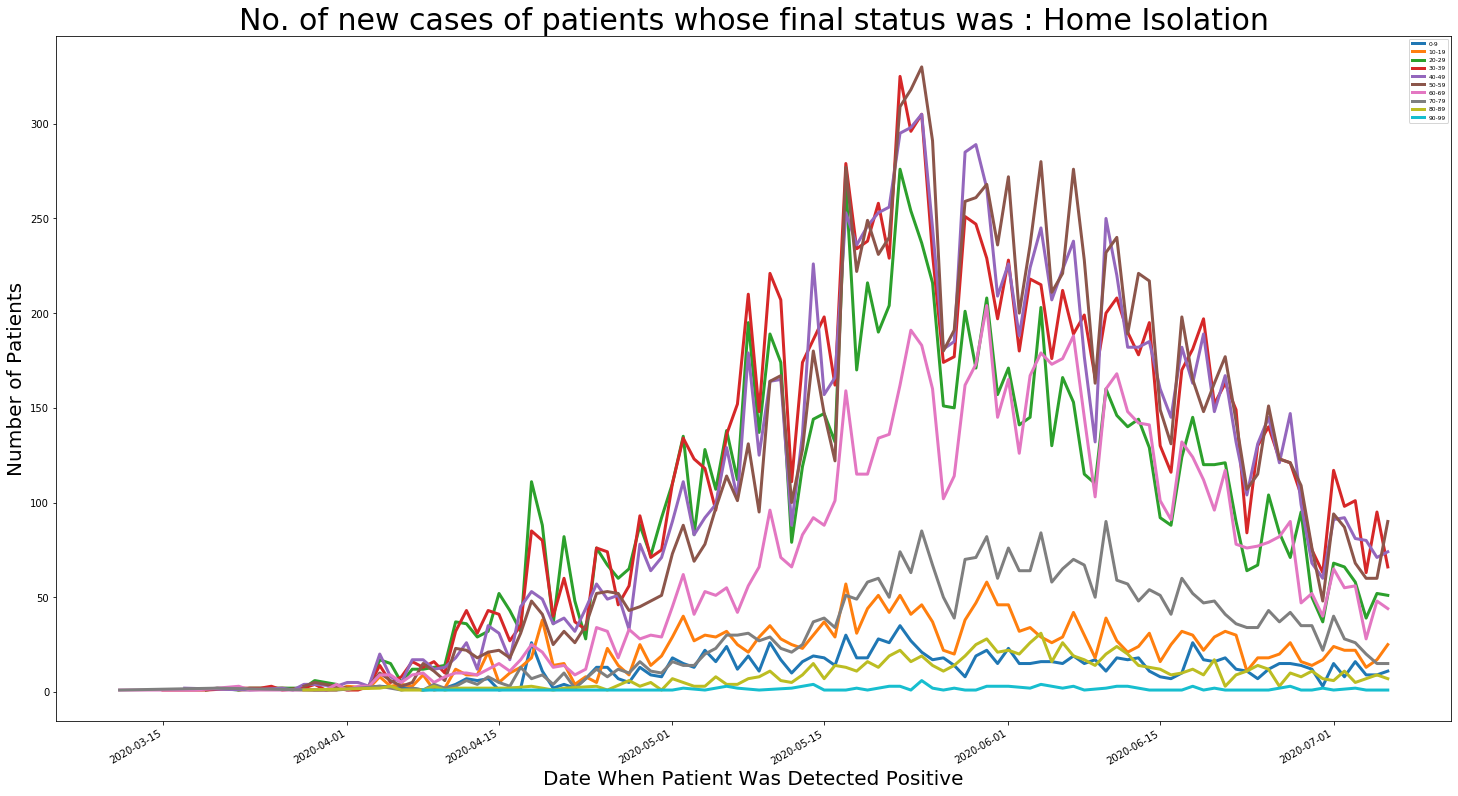

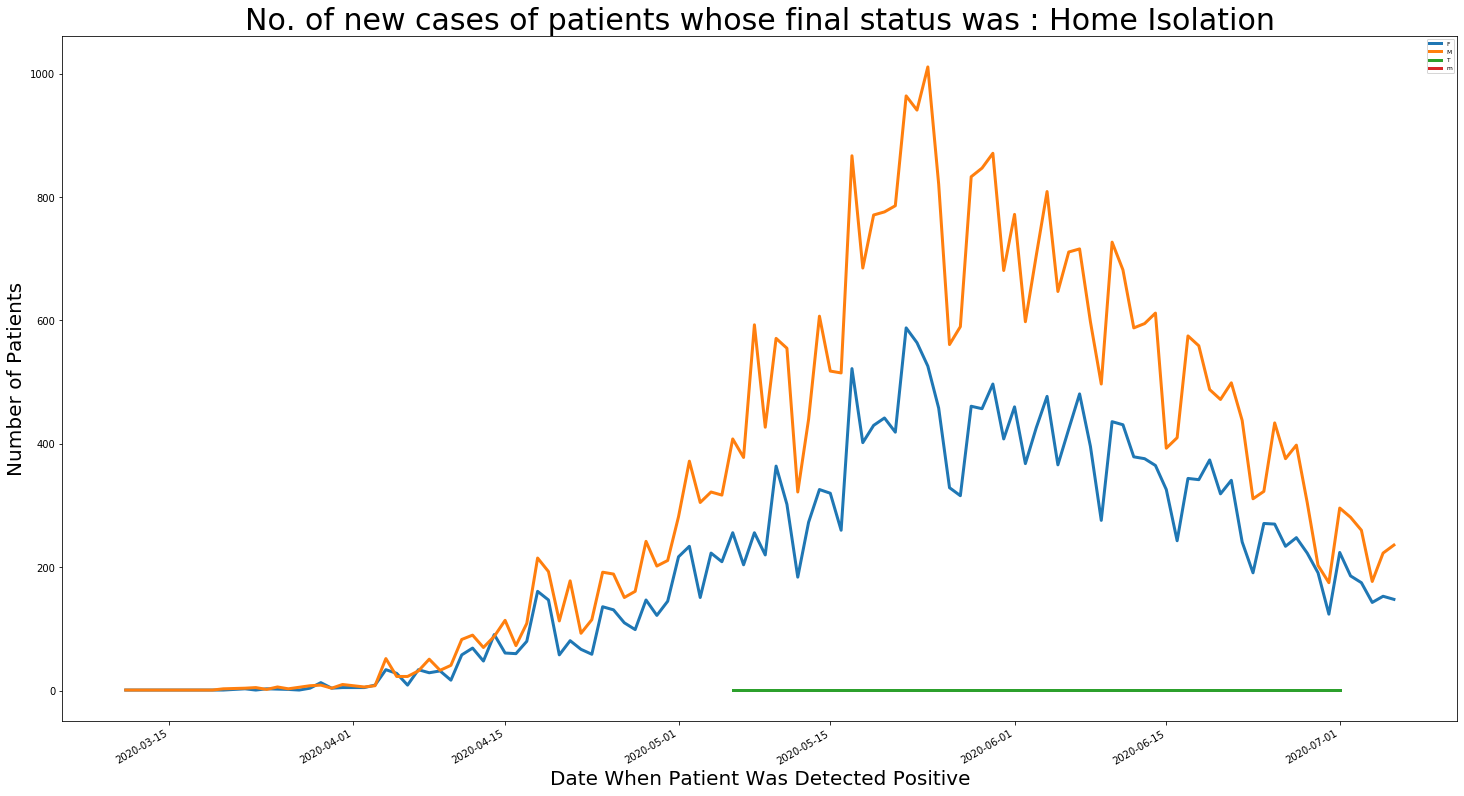

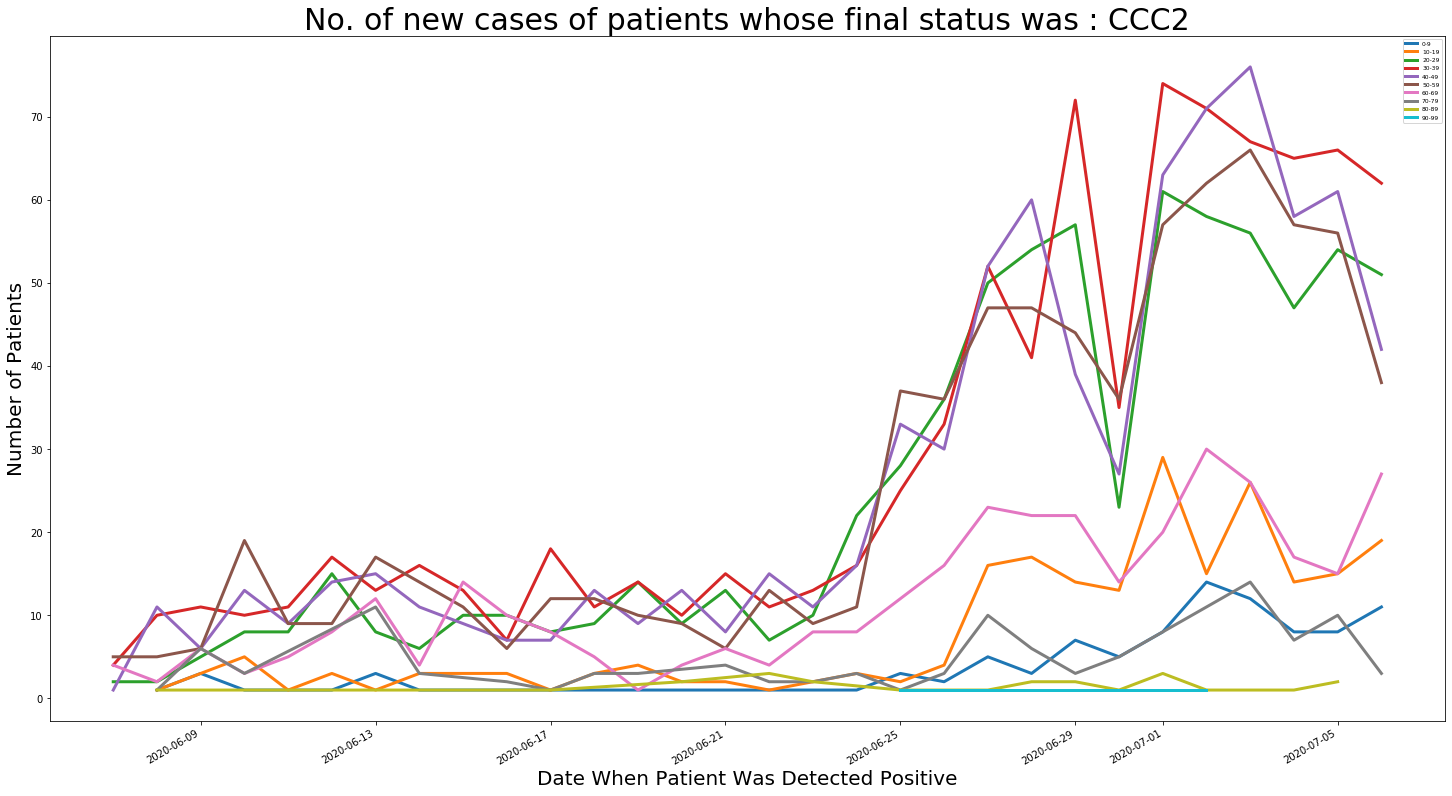

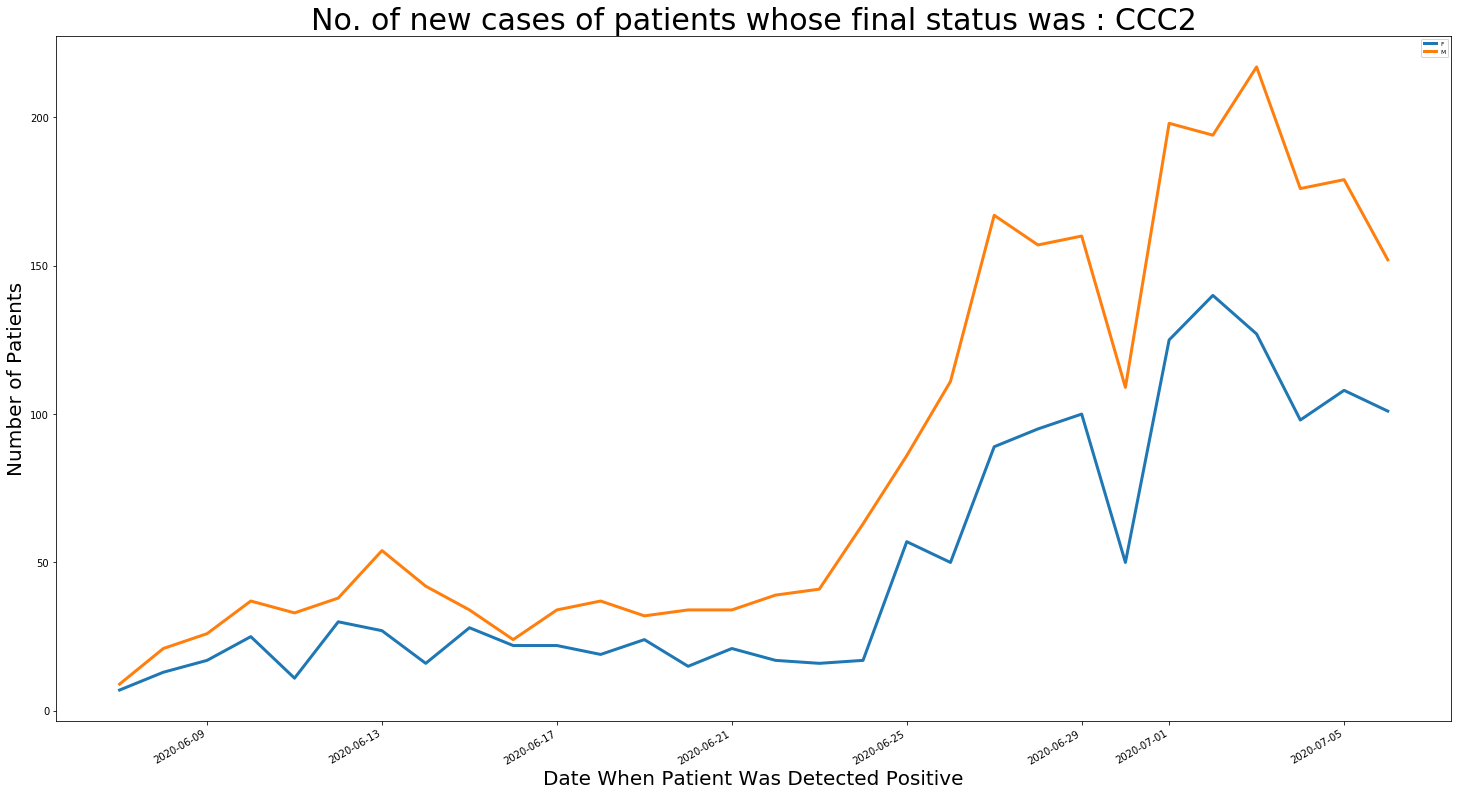

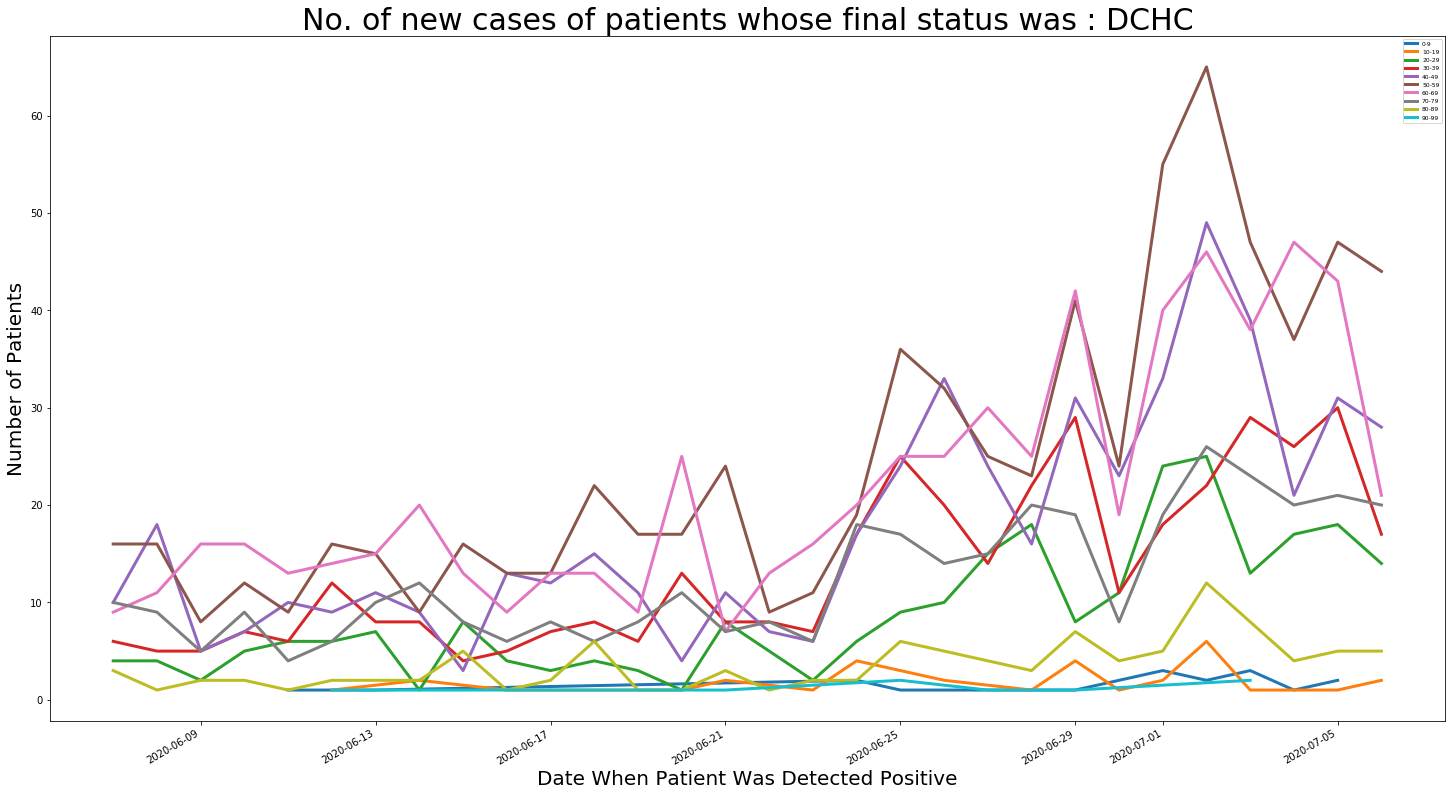

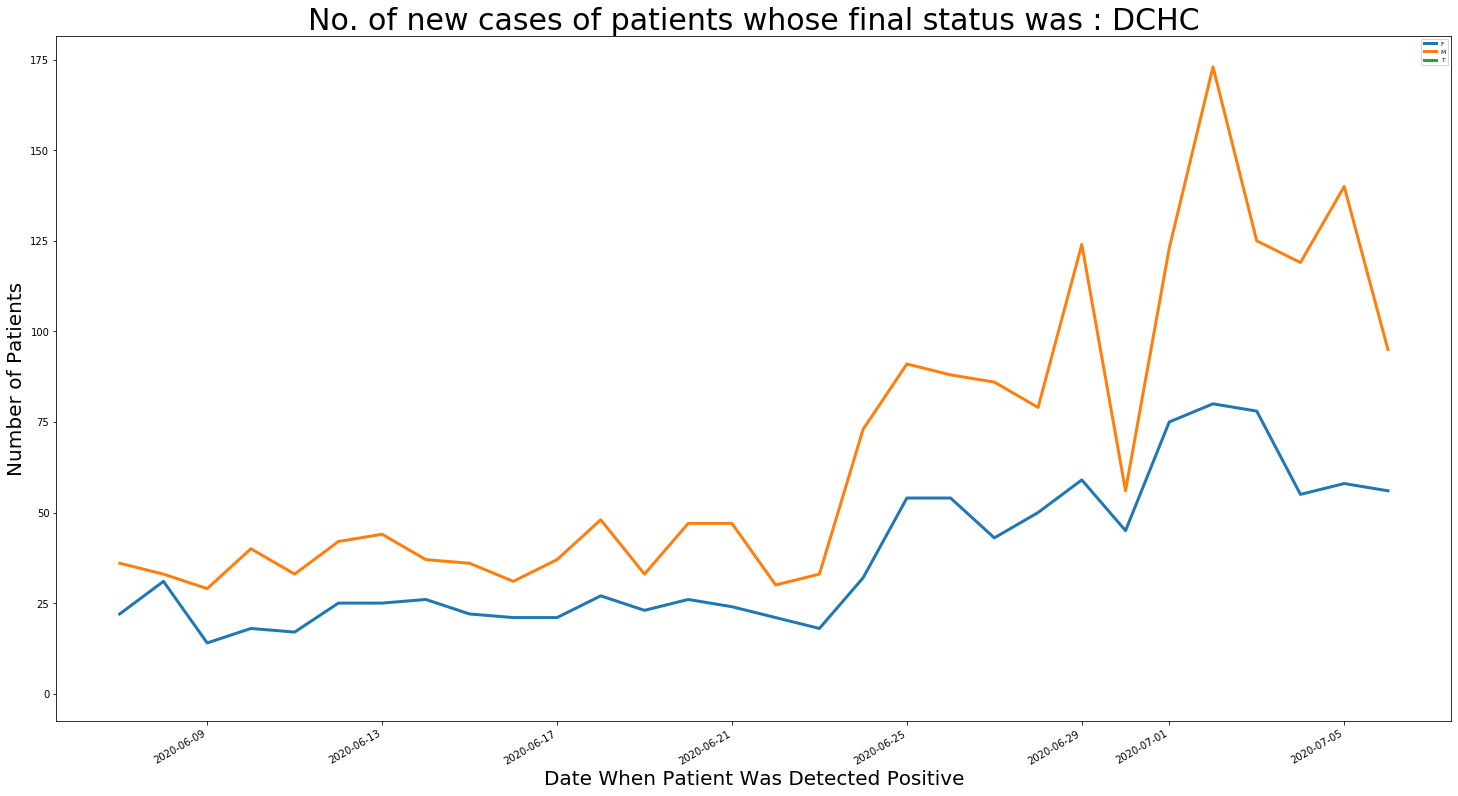

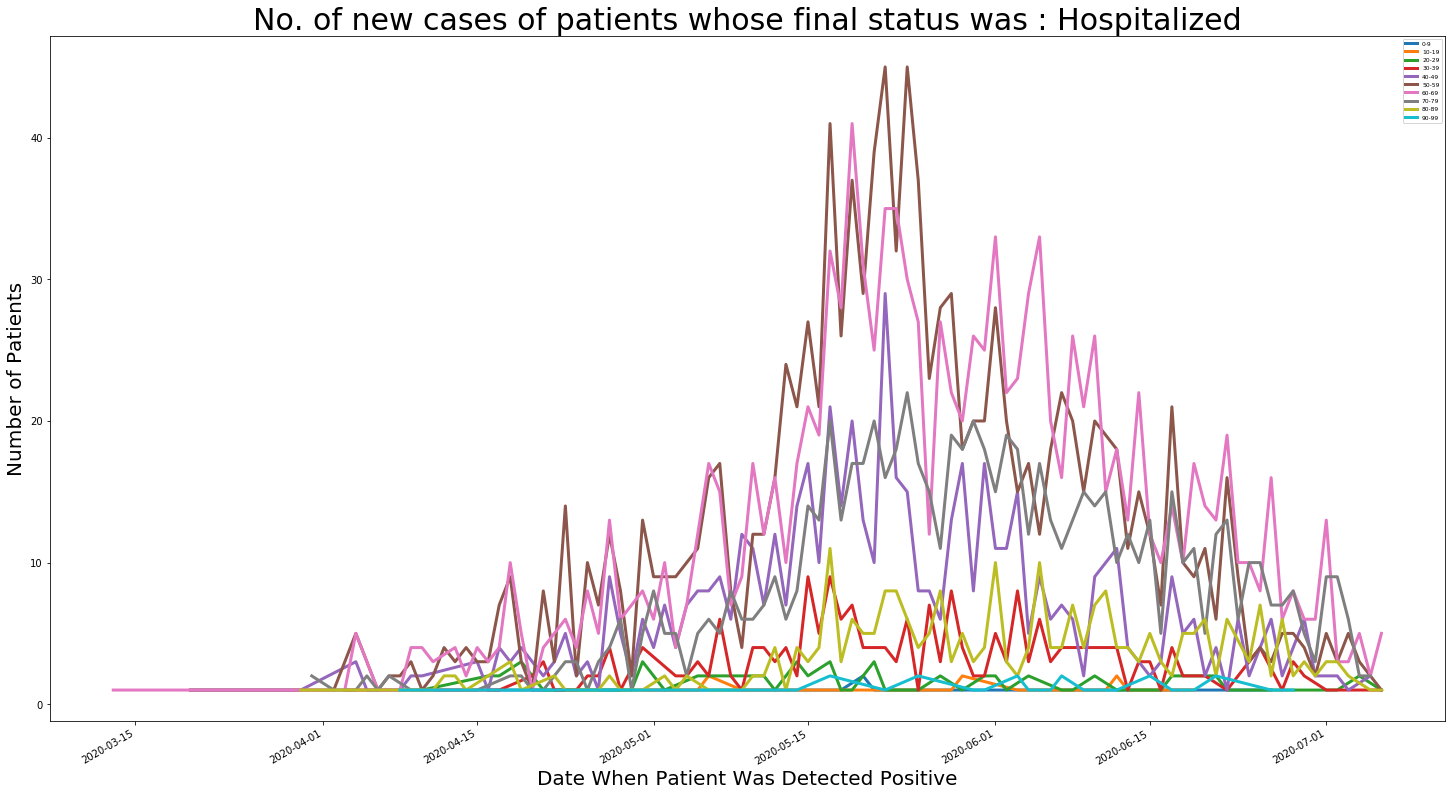

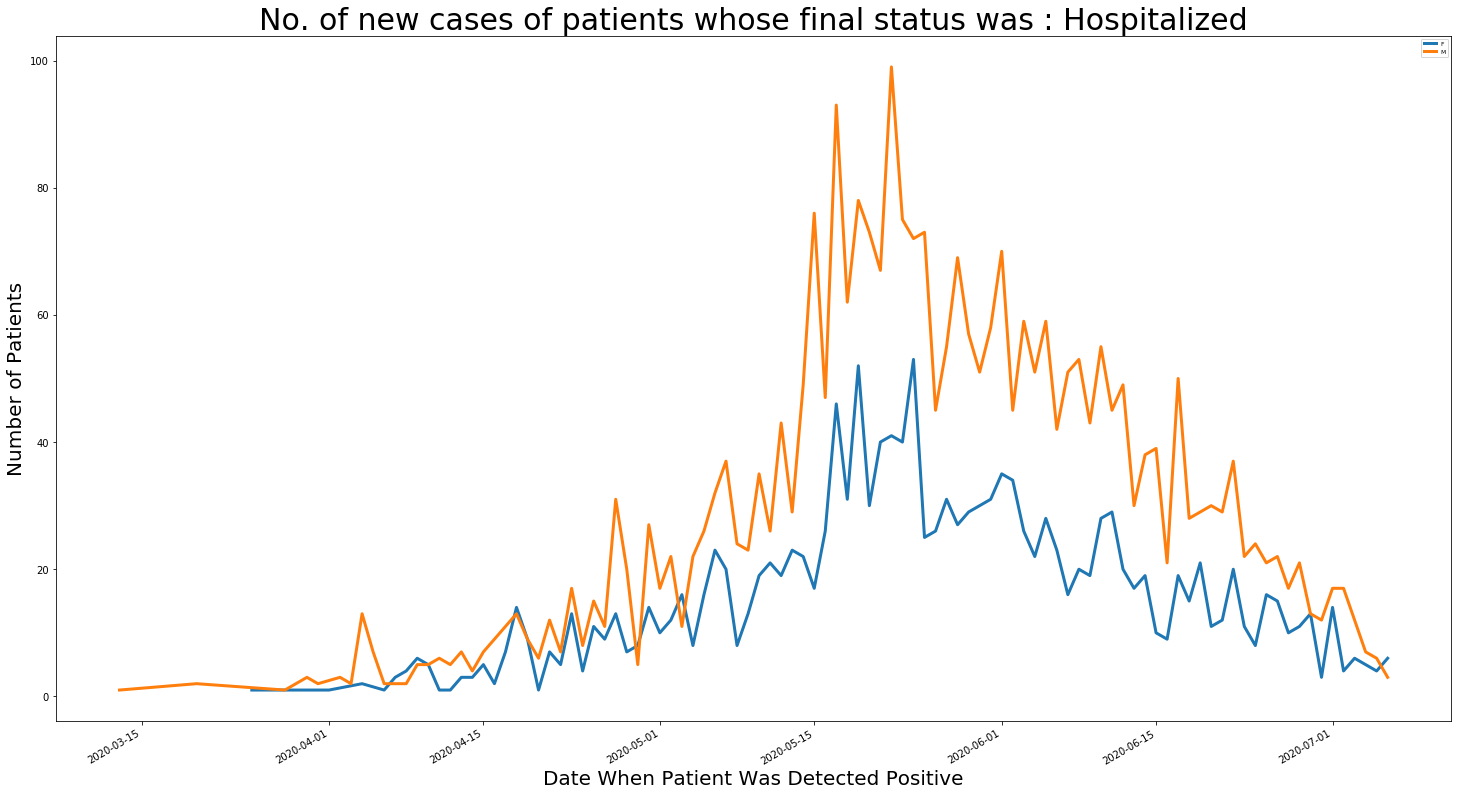

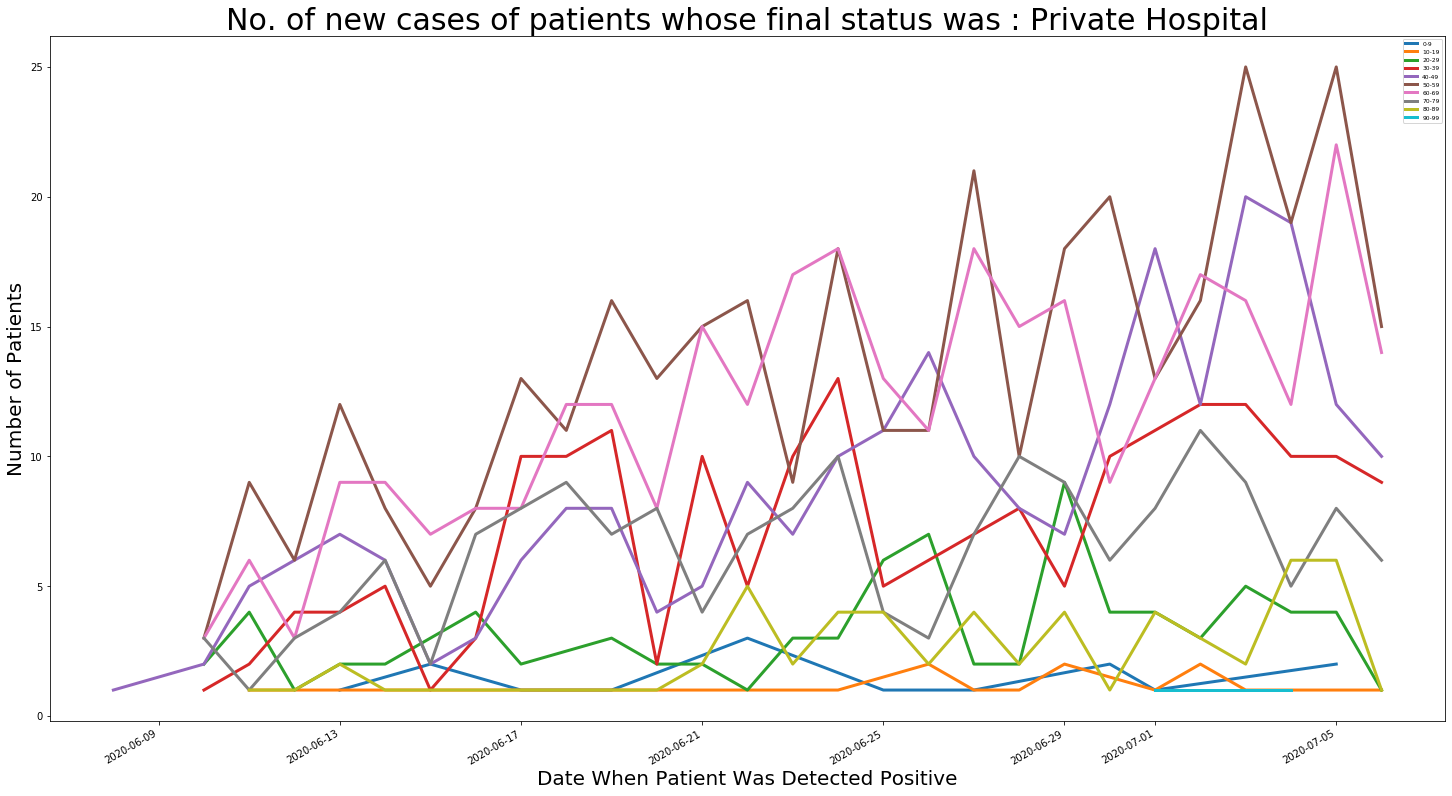

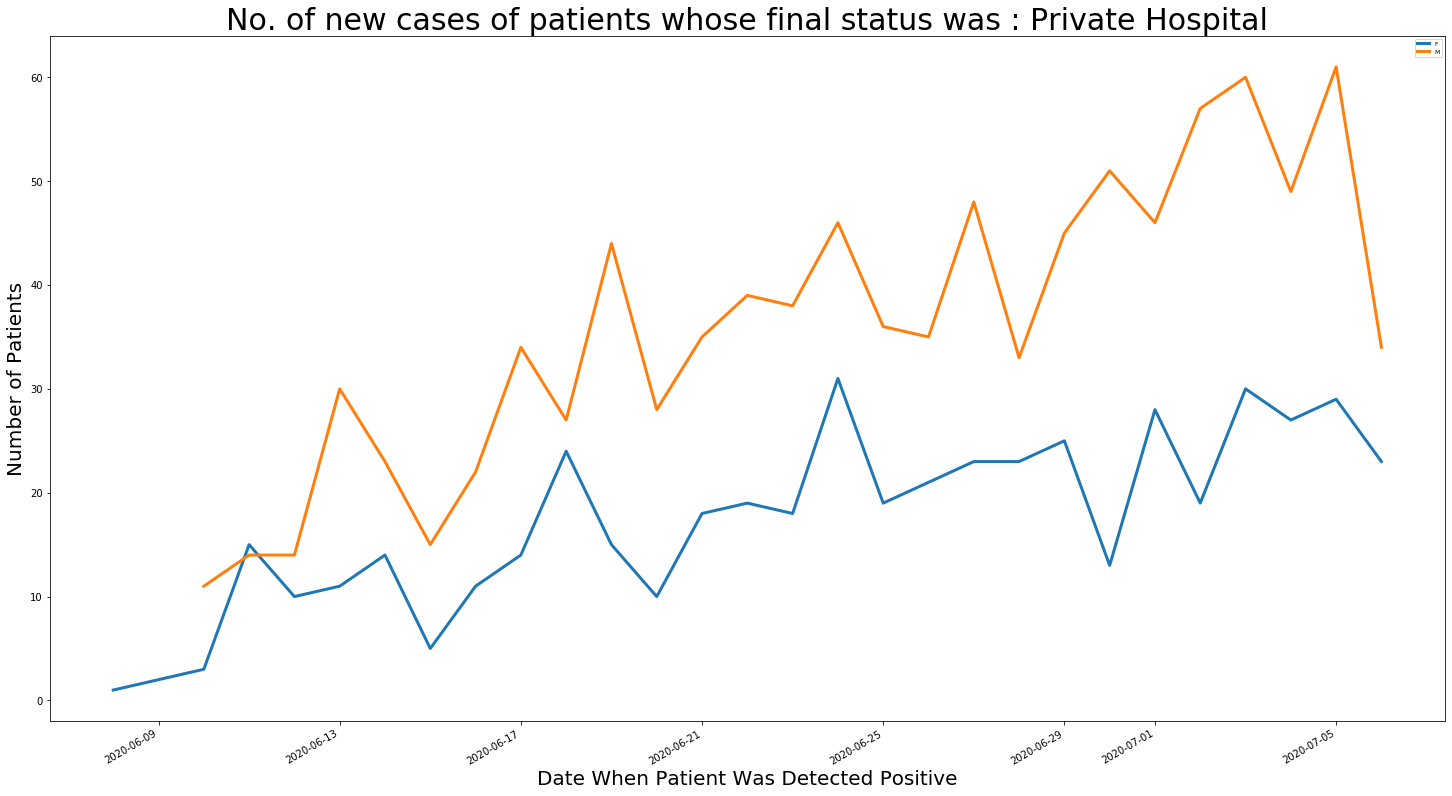

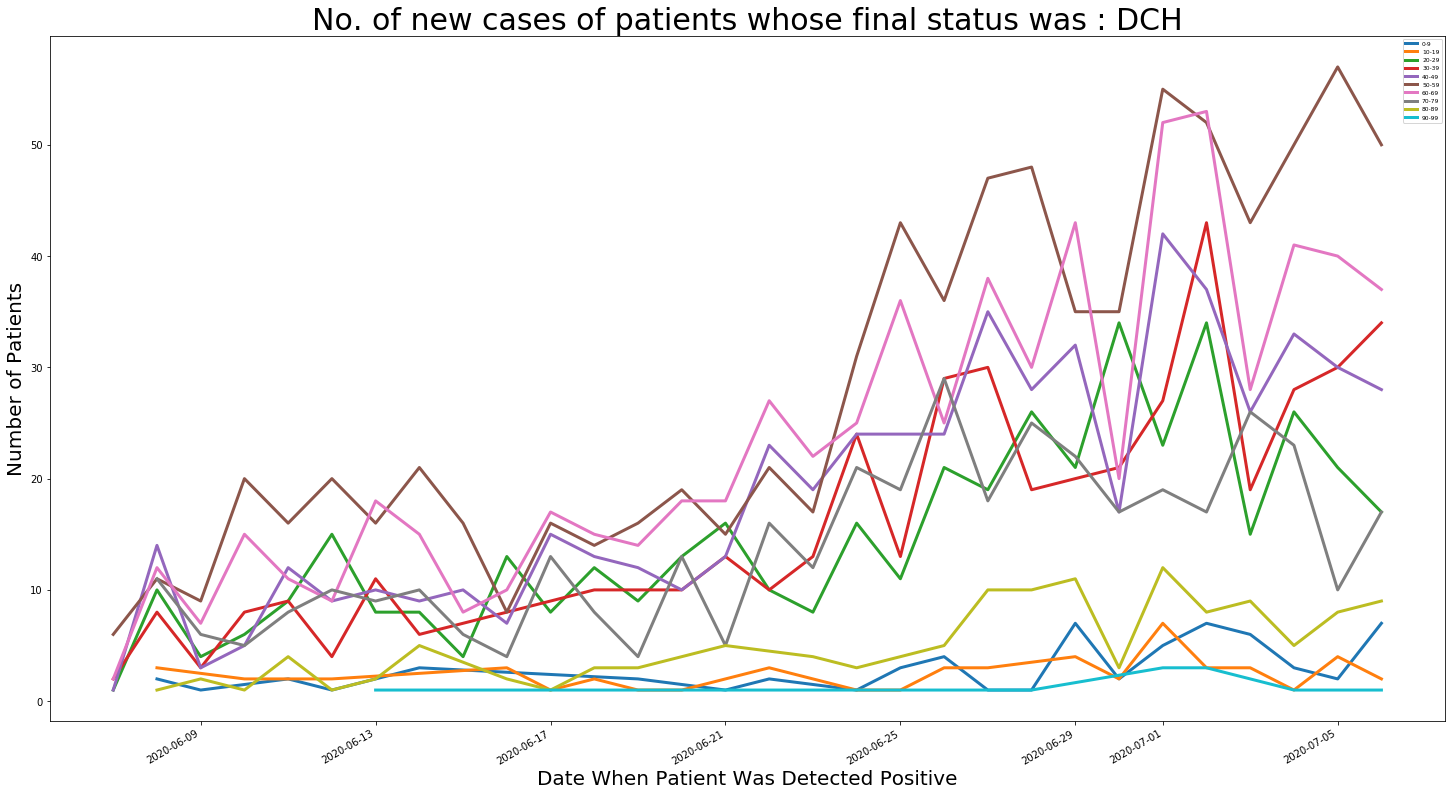

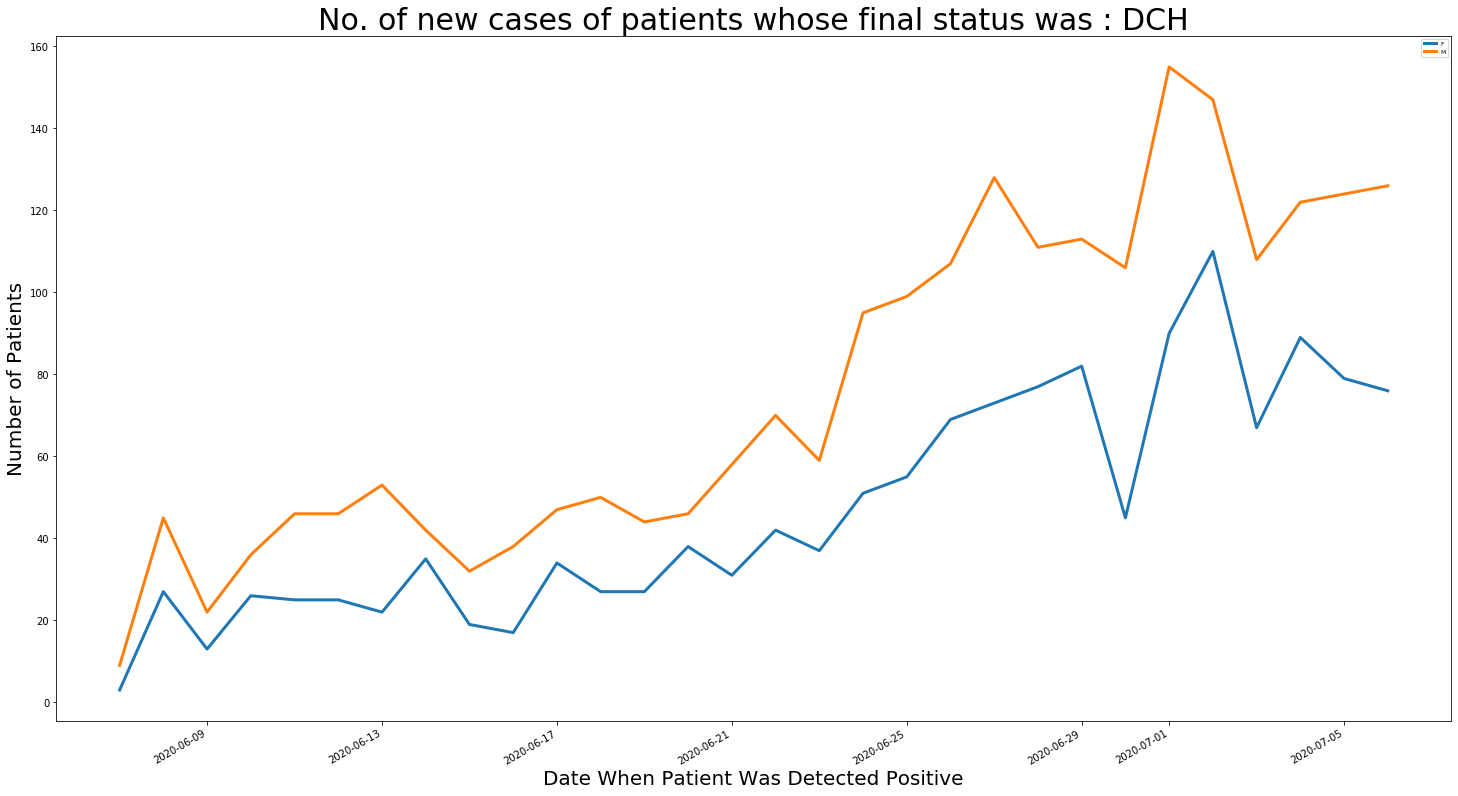

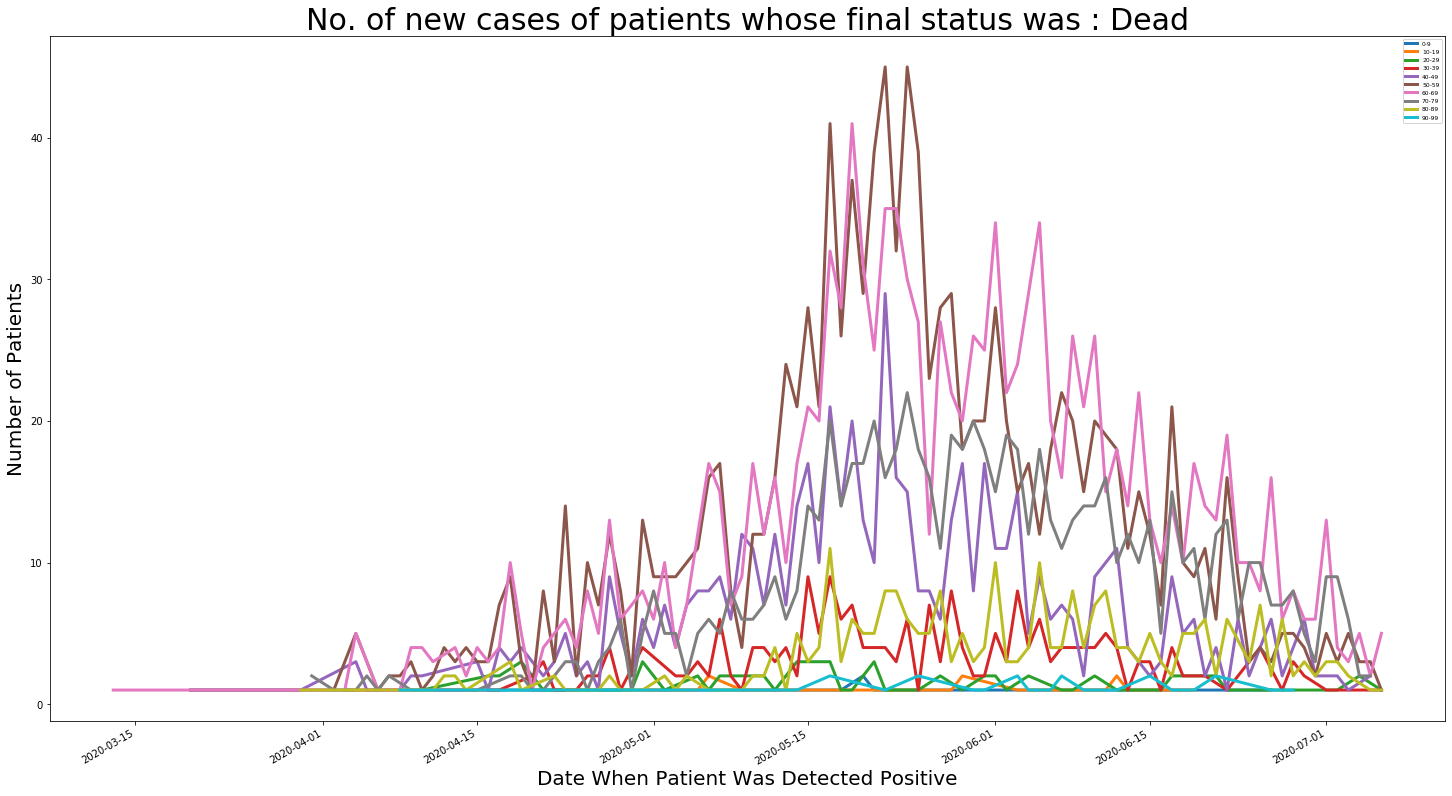

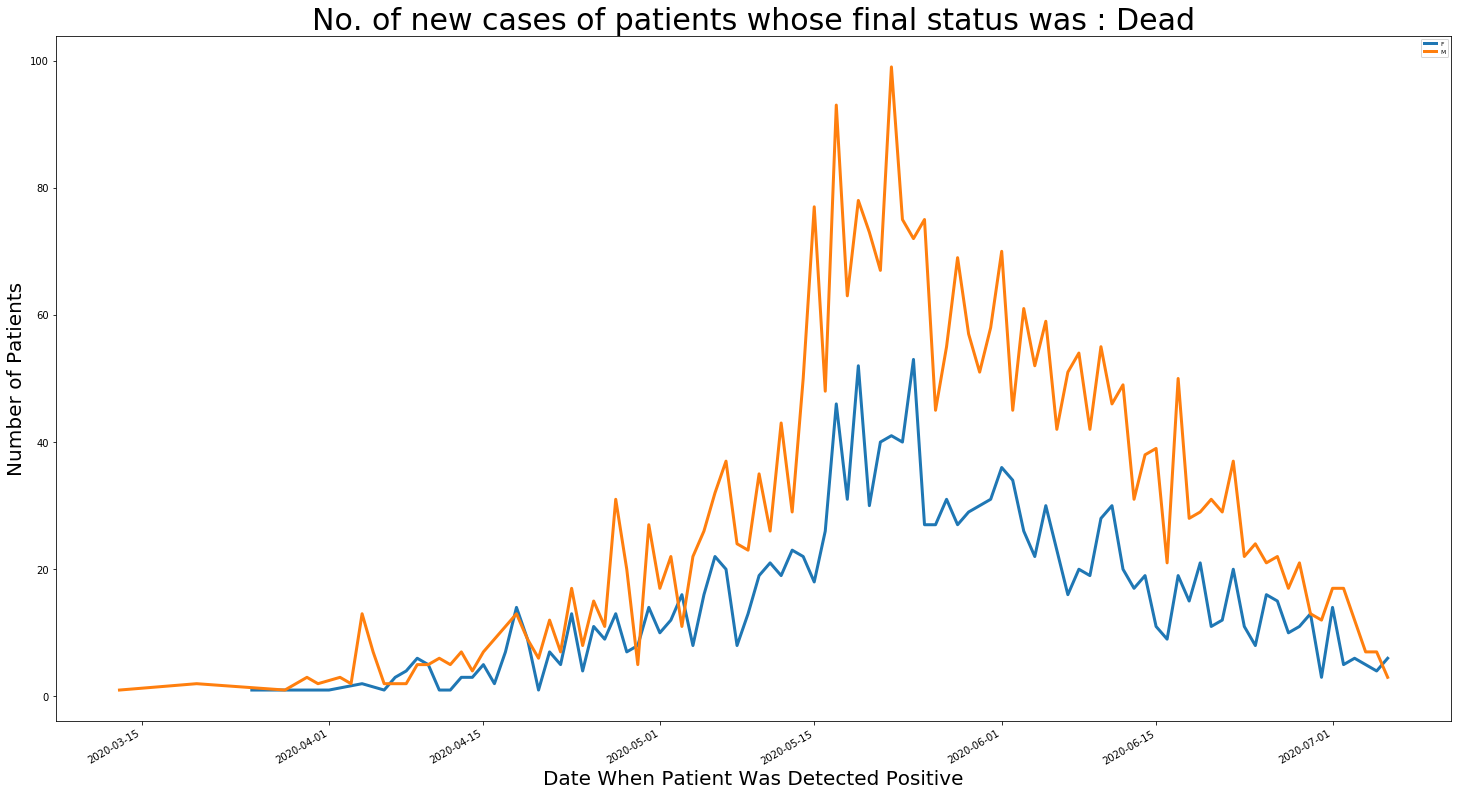

In [7]:
age_dist = {}
gender_dist = {}

an1, an2 = plot_age_gender(df,'_all_')
# an1,an2 = age_gender_distribution(df)
age_dist['All'] = an1
gender_dist['All'] = an2
# plot_age(an1,'All')
# plot_gender(an2,'All')

facility_types = ['Home Isolation','CCC2','DCHC','Hospitalized','Private Hospital','DCH']
for fac in facility_types :
    df_fac = df[df['Patient Location (Central)'] == fac]
    an1, an2 = plot_age_gender(df_fac,fac)
#     an1,an2 = age_gender_distribution(df_fac)
    age_dist[fac] = an1
    gender_dist[fac] = an2
#     plot_age(an1,fac)
#     plot_gender(an2,fac)

df_fatal = df[df['Patient Status (Central)'] == "Dead"]
an1, an2 = plot_age_gender(df_fatal,'Dead')
# an1,an2 = age_gender_distribution(df_fatal)
age_dist['Dead'] = an1
gender_dist['Dead'] = an2
# plot_age(an1,'Dead')
# plot_gender(an2,'Dead')